# IEAP-python-series02 — Complete Solution (Colab)
_Generated on 01 October 2025,

This notebook implements all parts of the assignment:
1) Create & iteratively improve a notebook that plots sinusoidal signals
2) Reproducibility & code quality callouts
3) Playing with integers (even/odd, multiples, primes) with clean functions and tests

> Tip: In Colab, you can run shell commands by prefixing them with `!` (e.g., `!git status`).

## 0) Git: repo setup, branching, and PR workflow (from Colab)
Run these cells to set up Git inside Colab. Replace placeholders in ALL CAPS with your data.

In [ ]:
# 0.1) Configure your identity (once per runtime)
!git config --global user.name "Tuba"
!git config --global user.email "ttuba1704@gmail.com"
!git config --global init.defaultBranch main

# 0.2) If starting from scratch: create a new repo folder and init
# Skip this if you've already cloned your repo
%mkdir -p /content/ieap-series02
%cd /content/ieap-series02
!git init

# 0.3) (Option A) If you already have a remote repo, clone it instead of init:
# %cd /content
# !git clone https://github.com/YOUR_USERNAME/YOUR_REPO.git
# %cd /content/YOUR_REPO

# 0.4) Create a new branch for your 'better version' work
!git checkout -b feature/sinusoids-better

# 0.5) Save this notebook into the repo directory so you can commit it
import shutil, os, pathlib
nb_name = "IEAP_series02_solution.ipynb"
src = "/mnt/data/IEAP_series02_solution.ipynb"
dst = os.path.join(os.getcwd(), nb_name)
if os.path.exists(src):
    shutil.copy(src, dst)
print("Notebook copied to repo path:", dst)

# 0.6) Stage & commit
!git add .
!git commit -m "Add initial solution notebook for series02"

# 0.7) Connect to remote and push branch (replace URL)
# !git remote add origin https://github.com/YOUR_USERNAME/YOUR_REPO.git
# !git push -u origin feature/sinusoids-better

# 0.8) After finishing your 'final version', create another branch and repeat
# !git checkout -b feature/sinusoids-final
# ...do work...
# !git add . && git commit -m "Finalize sinusoid notebook"
# !git push -u origin feature/sinusoids-final

# 0.9) Create a Pull Request in GitHub UI from your feature branch into main.


/content/ieap-series02
Initialized empty Git repository in /content/ieap-series02/.git/
Switched to a new branch 'feature/sinusoids-better'
Notebook copied to repo path: /content/ieap-series02/IEAP_series02_solution.ipynb
On branch feature/sinusoids-better

Initial commit

nothing to commit (create/copy files and use "git add" to track)


## 1.1) Draft: plot a sine wave
Math (for frequency $f$, amplitude $A$, phase $\phi$):
$$ s(t) = A \sin(2\pi f t + \phi) $$

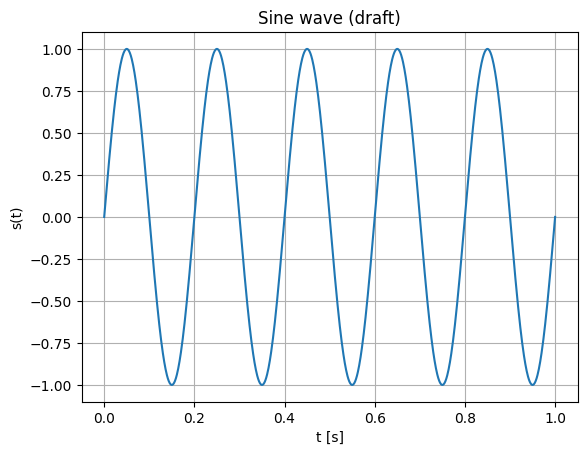

In [ ]:
# 1.1) Draft implementation
import numpy as np
import matplotlib.pyplot as plt

# time vector: 1000 points from 0 to 1 s
t = np.linspace(0, 1, 1000, endpoint=True)

# basic sine parameters
A = 1.0        # amplitude
f = 5.0        # Hz
phi = 0.0      # rad

s = A * np.sin(2*np.pi*f*t + phi)

plt.figure()
plt.plot(t, s)
plt.title("Sine wave (draft)")
plt.xlabel("t [s]")
plt.ylabel("s(t)")
plt.grid(True)
plt.savefig("sine_draft.png", dpi=150, bbox_inches="tight")
plt.show()

## 1.2) Better version: add cosine, legend, second y-axis, labels, save to PDF
We'll produce a figure with sine on the left y-axis and cosine on a secondary y-axis to satisfy the requirements.

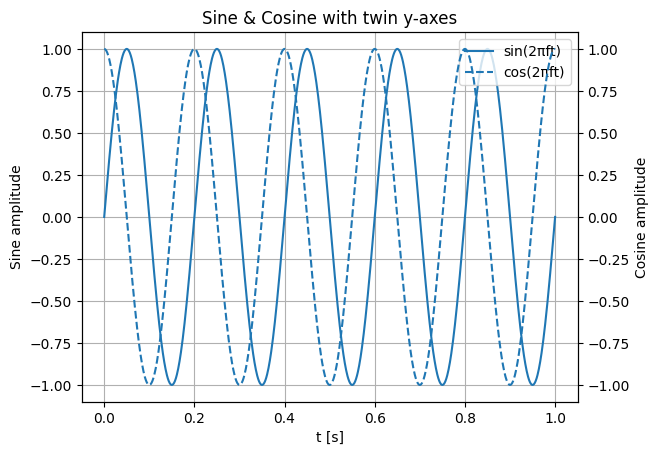

In [ ]:
# 1.2) Better version
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000, endpoint=True)
f = 5.0
sine = np.sin(2*np.pi*f*t)
cosine = np.cos(2*np.pi*f*t)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(t, sine, label="sin(2πft)")
ax1.set_xlabel("t [s]")
ax1.set_ylabel("Sine amplitude")
ax1.grid(True)

ax2 = ax1.twinx()
lns2 = ax2.plot(t, cosine, label="cos(2πft)", linestyle="--")
ax2.set_ylabel("Cosine amplitude")

# one combined legend
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right")

plt.title("Sine & Cosine with twin y-axes")
plt.savefig("sinusoid_better.pdf", bbox_inches="tight")
plt.show()

## 1.3) Final version: clean functions, parameters, and reusable plotting
We wrap logic in functions, add docstrings, type hints, and perform basic parameter validation.

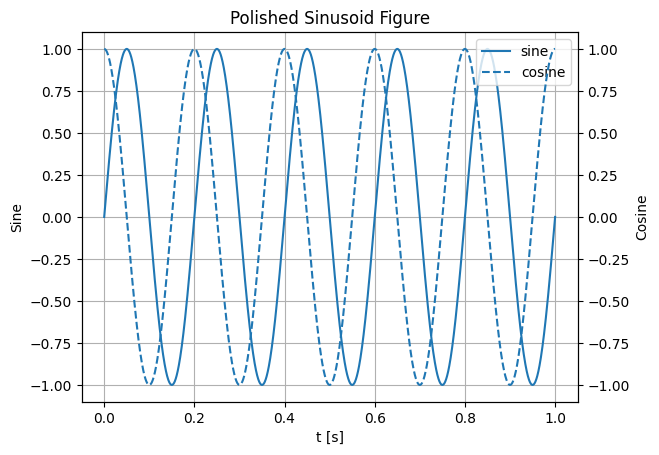

In [ ]:
# 1.3) Final version with functions
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt

def make_time(duration: float, num: int) -> np.ndarray:
    """Create a linearly spaced time vector from 0..duration with `num` samples."""
    if duration <= 0:
        raise ValueError("duration must be positive")
    if num < 2:
        raise ValueError("num must be >= 2")
    return np.linspace(0.0, duration, num, endpoint=True)

def sine_wave(t: np.ndarray, amplitude: float, freq_hz: float, phase_rad: float=0.0) -> np.ndarray:
    """Compute sine wave: A * sin(2π f t + φ)."""
    return amplitude * np.sin(2*np.pi*freq_hz*t + phase_rad)

def cosine_wave(t: np.ndarray, amplitude: float, freq_hz: float, phase_rad: float=0.0) -> np.ndarray:
    """Compute cosine wave: A * cos(2π f t + φ)."""
    return amplitude * np.cos(2*np.pi*freq_hz*t + phase_rad)

def plot_sine_cosine(t: np.ndarray, s: np.ndarray, c: np.ndarray, title: str, outpath: str) -> None:
    fig, ax1 = plt.subplots()
    l1 = ax1.plot(t, s, label="sine")
    ax1.set_xlabel("t [s]"); ax1.set_ylabel("Sine")
    ax1.grid(True)
    ax2 = ax1.twinx()
    l2 = ax2.plot(t, c, label="cosine", linestyle="--")
    ax2.set_ylabel("Cosine")
    ln = l1 + l2
    labs = [l.get_label() for l in ln]
    ax1.legend(ln, labs, loc="upper right")
    plt.title(title)
    plt.savefig(outpath, bbox_inches="tight")
    plt.show()

# Example: generate and save a polished plot
t = make_time(duration=1.0, num=2000)
s = sine_wave(t, amplitude=1.0, freq_hz=5.0, phase_rad=0.0)
c = cosine_wave(t, amplitude=1.0, freq_hz=5.0, phase_rad=0.0)
plot_sine_cosine(t, s, c, title="Polished Sinusoid Figure", outpath="sinusoid_final.pdf")

## 2) Reproducibility & Code Quality pointers
- Keep small, focused commits with clear messages.
- Document assumptions and parameter meanings.
- Prefer pure functions with inputs/outputs over hidden state.
- Validate parameters and add quick checks.
- Save figures with deterministic generation (seed random if needed).
- Use branches for iterations; open PRs even if working solo to self-review.

## 3.1) Even or odd — definition & implementation
**Definition:** An integer $n$ is even iff $\exists k\in\mathbb{Z}$ s.t. $n=2k$. Otherwise it is odd.

In [ ]:
def is_even(n: int) -> bool:
    """Return True if n is even."""
    return (n % 2) == 0

series_0_10 = list(range(0, 11))
for n in series_0_10:
    print(f"{n} is {'even' if is_even(n) else 'odd'}")

0 is even
1 is odd
2 is even
3 is odd
4 is even
5 is odd
6 is even
7 is odd
8 is even
9 is odd
10 is even


## 3.2) Multiple or not — definition & functions
**Definition:** An integer $a$ is a multiple of $m \ne 0$ iff $\exists k\in\mathbb{Z}$ s.t. $a = k\,m$.

In [ ]:
from typing import Iterable, List

def is_multiple_of(n: int, m: int) -> bool:
    if m == 0:
        raise ValueError("m must be non-zero")
    return (n % m) == 0

def multiples_mask(seq: Iterable[int], m: int) -> List[bool]:
    return [is_multiple_of(x, m) for x in seq]

nums_0_20 = list(range(0, 21))

print("Multiples of 3:")
for x in nums_0_20:
    print(f"{x}: {'yes' if is_multiple_of(x, 3) else 'no'}")

print("\nMultiples of 5:")
for x in nums_0_20:
    print(f"{x}: {'yes' if is_multiple_of(x, 5) else 'no'}")

m = 7  # you can change this
print(f"\nMultiples of {m}:", multiples_mask(nums_0_20, m))

Multiples of 3:
0: yes
1: no
2: no
3: yes
4: no
5: no
6: yes
7: no
8: no
9: yes
10: no
11: no
12: yes
13: no
14: no
15: yes
16: no
17: no
18: yes
19: no
20: no

Multiples of 5:
0: yes
1: no
2: no
3: no
4: no
5: yes
6: no
7: no
8: no
9: no
10: yes
11: no
12: no
13: no
14: no
15: yes
16: no
17: no
18: no
19: no
20: yes

Multiples of 7: [True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False]


## 3.3) Prime or not — definition & algorithms
**Definition:** An integer $p>1$ is prime iff its only positive divisors are 1 and $p$.

We implement: (1) a simple primality test; (2) Sieve of Eratosthenes for ranges; and demonstrate up to 20 million (Colab is fast, but be mindful of RAM).

In [ ]:
import math
from typing import List

def is_prime_basic(n: int) -> bool:
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    r = int(math.isqrt(n))
    for d in range(3, r+1, 2):
        if n % d == 0:
            return False
    return True

def sieve_primes_upto(N: int) -> List[int]:
    """Return list of primes in [0..N] using an optimized sieve."""
    if N < 2:
        return []
    # Only track odd numbers to halve memory
    size = (N // 2) + 1   # index i represents number 2*i+1
    sieve = bytearray(b"\x01") * size
    sieve[0] = 0  # 1 is not prime
    limit = int(math.isqrt(N))
    for i in range(1, (limit // 2) + 1):  # i for number p = 2*i+1
        if sieve[i]:
            p = 2*i + 1
            # start from p*p; index for p*p is ((p*p)-1)//2
            start = ((p*p) - 1) // 2
            sieve[start::p] = b"\x00" * ((size - start - 1)//p + 1)
    primes = [2] + [2*i+1 for i in range(1, size) if sieve[i]]
    return primes

# Primes in [0..20]
print("Primes in [0..20]:", [n for n in range(0, 21) if is_prime_basic(n)])

# Primes in [0..200]
pr200 = sieve_primes_upto(200)
print("\nPrimes in [0..200]:", pr200)

# Large range demo (be cautious with runtime/memory)
# Uncomment to run up to 20_000_000 (takes time and memory but works in Colab runtimes)
# big_primes = sieve_primes_upto(20_000_000)
# print("Number of primes <= 20,000,000:", len(big_primes))

Primes in [0..20]: [2, 3, 5, 7, 11, 13, 17, 19]

Primes in [0..200]: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]


## 3.4) Code review checklist (before PR)
- Readability: docstrings, names, comments, small functions
- Tests/checks: edge cases for zero/negatives, invalid params
- Git: small commits, meaningful messages, PR description
- Performance: no unnecessary loops/allocations; vectorize if helpful
- Results: figures saved, notebook runs top-to-bottom without errors